In [12]:
import math, glob, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [32]:
importlib.reload(wrf)

# run='run_02_land_t08'
run='run_02_CTRL'
wolist=wrf.wolist(run)
flist=[wrf.wopath(run,wo) for wo in wolist]
flist=flist[::24]
flist=flist[2:]

r=wrf.getRcoord(flist[0])

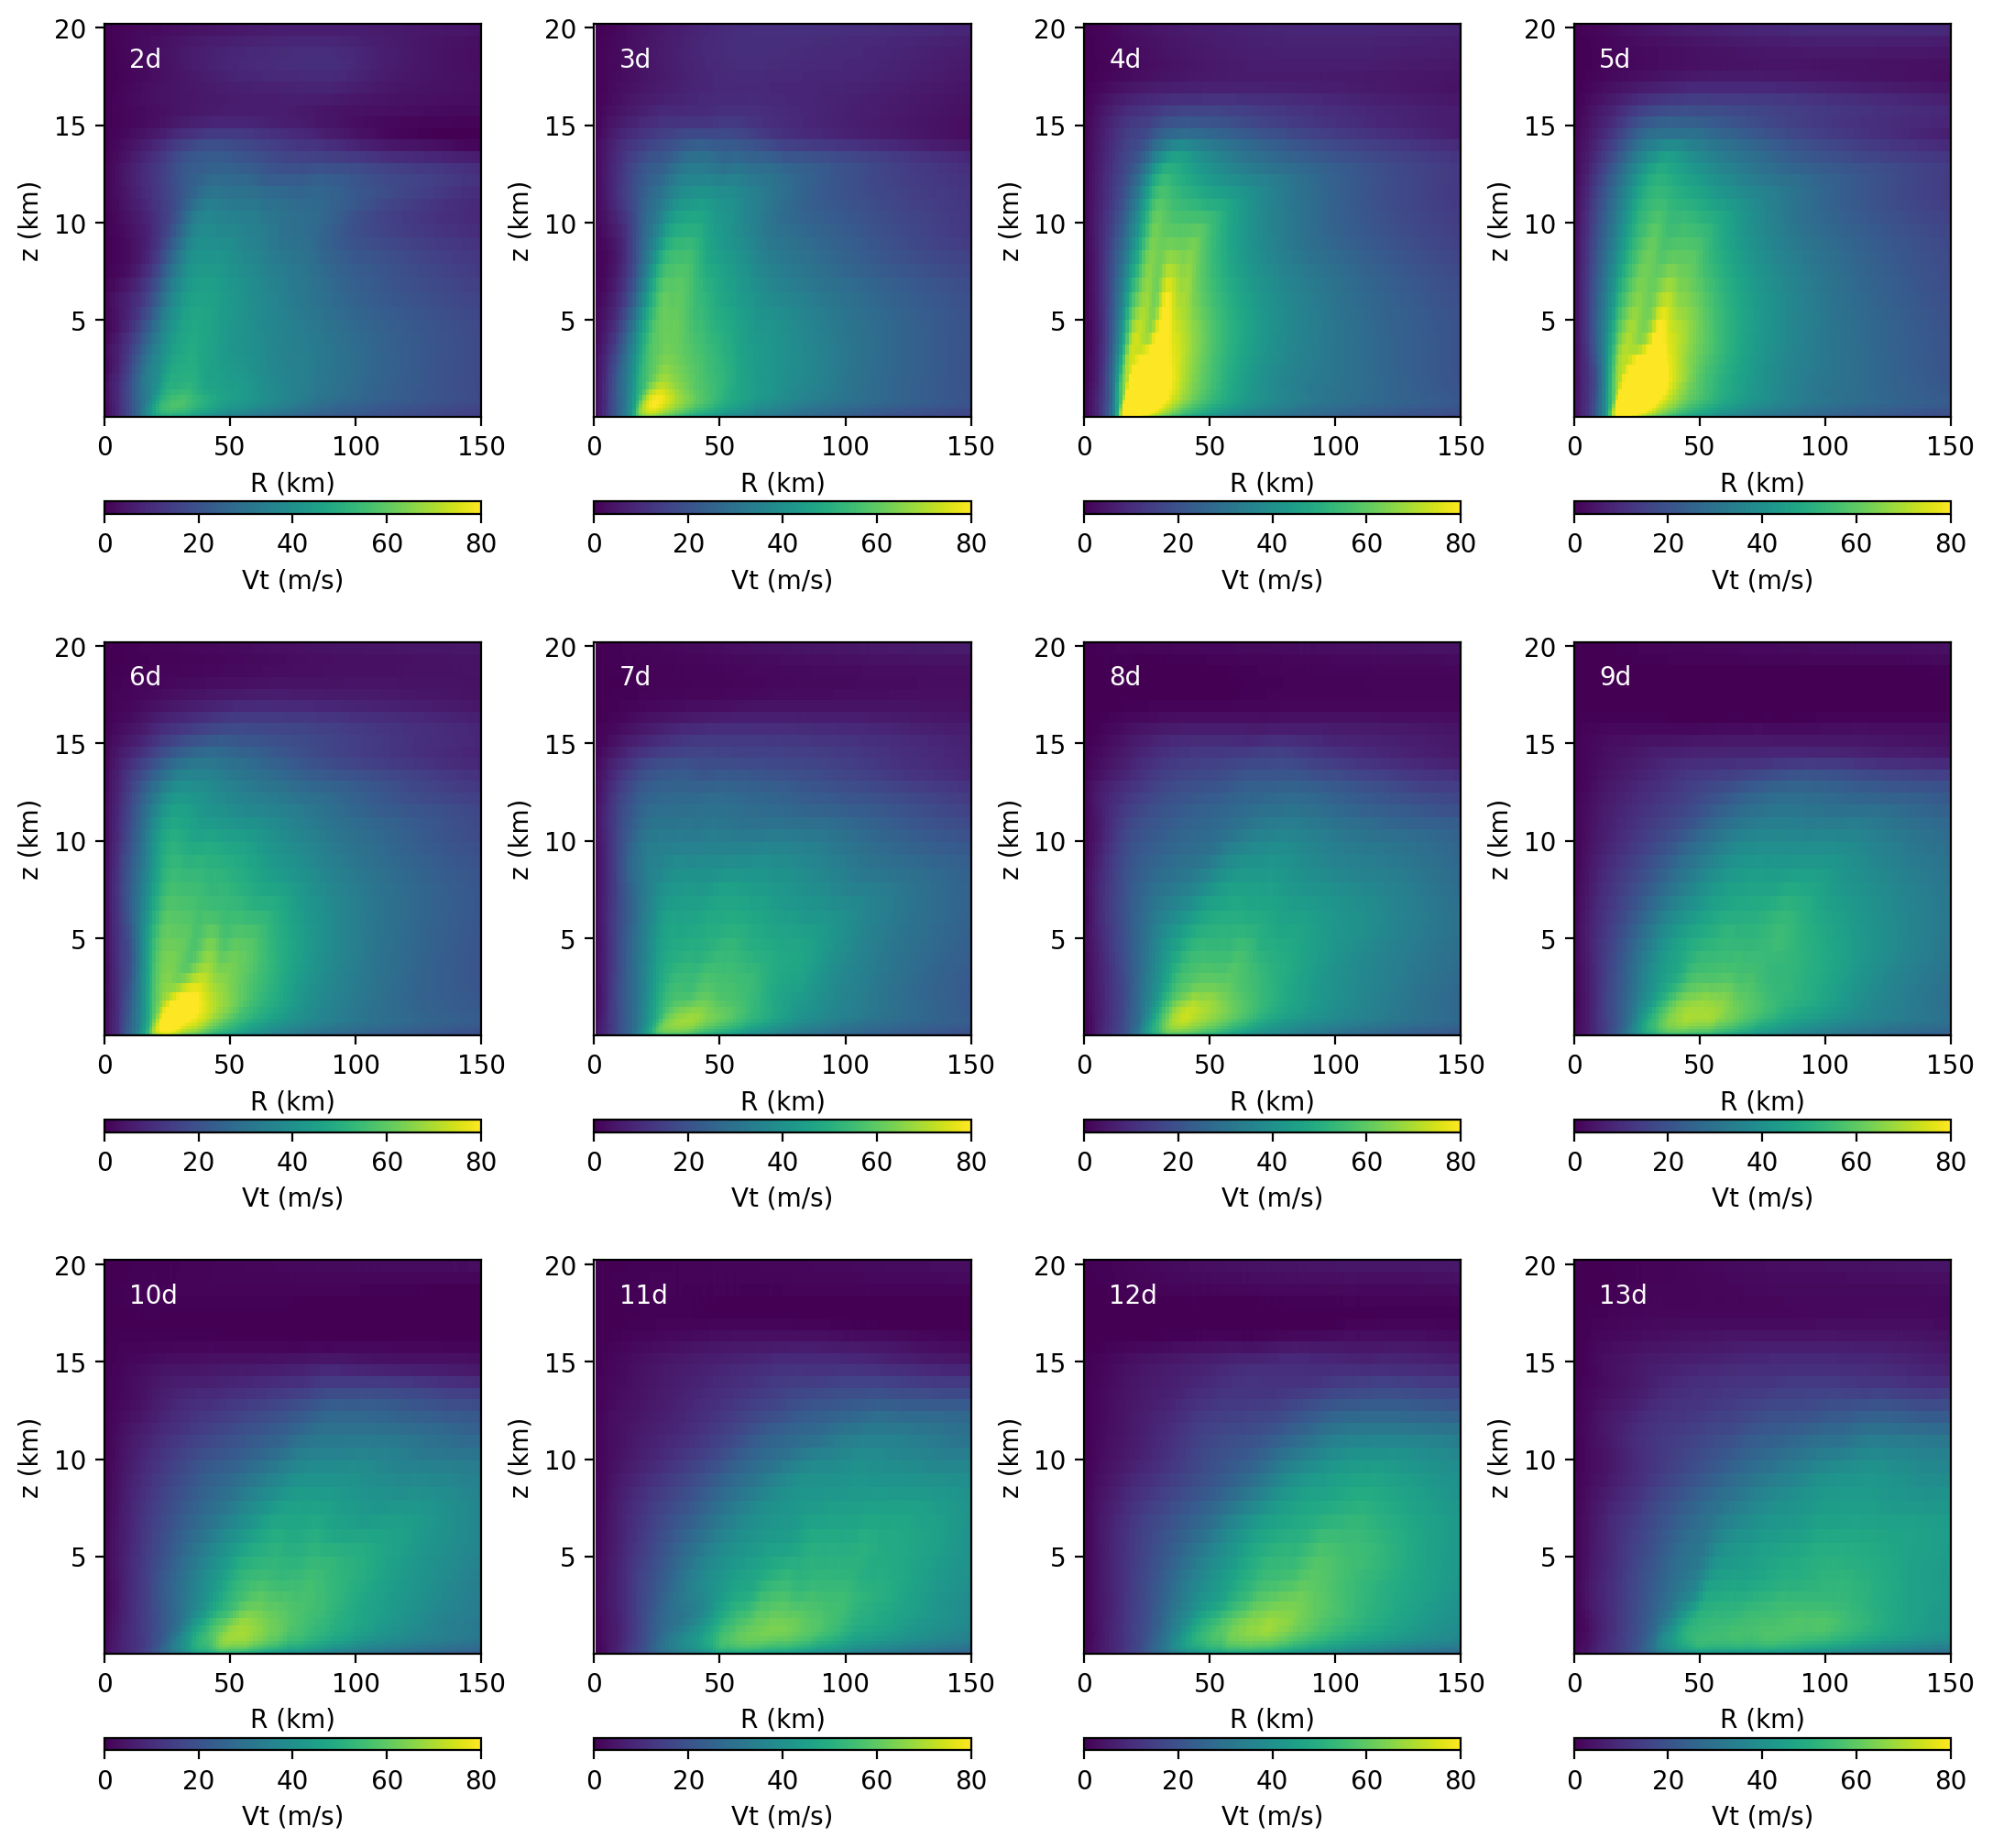

In [34]:
fig,axs=plt.subplots(3,4,figsize=(13,13),dpi=200)
plt.subplots_adjust(hspace=0.1,wspace=0.3)
# cl=50

for n,fname in enumerate(flist[:12]):
    ax=axs.flat[n]
    vr=wrf.getWRF(fname,'vt',z='full',vtype='az')
    z=wrf.getHeightCoord(fname)
    r=wrf.getRcoord(fname)
    im=ax.pcolormesh(r,z[1:]/1000,vr.T,cmap=plt.get_cmap('viridis'),shading='nearest')
    imclim=im.get_clim()
    im.set_clim(0,imclim[1])
    im.set_clim(0,80)
    ax.set_xlim(0,150)
    ax.set_xlabel('R (km)')
    ax.set_ylabel('z (km)')
#     ax.text(10,18,str(n)+'h',color='w')
    ax.text(10,18,str(n+2)+'d',color='w')
    fig.colorbar(im,ax=ax,orientation='horizontal',aspect=30,label='Vt (m/s)')

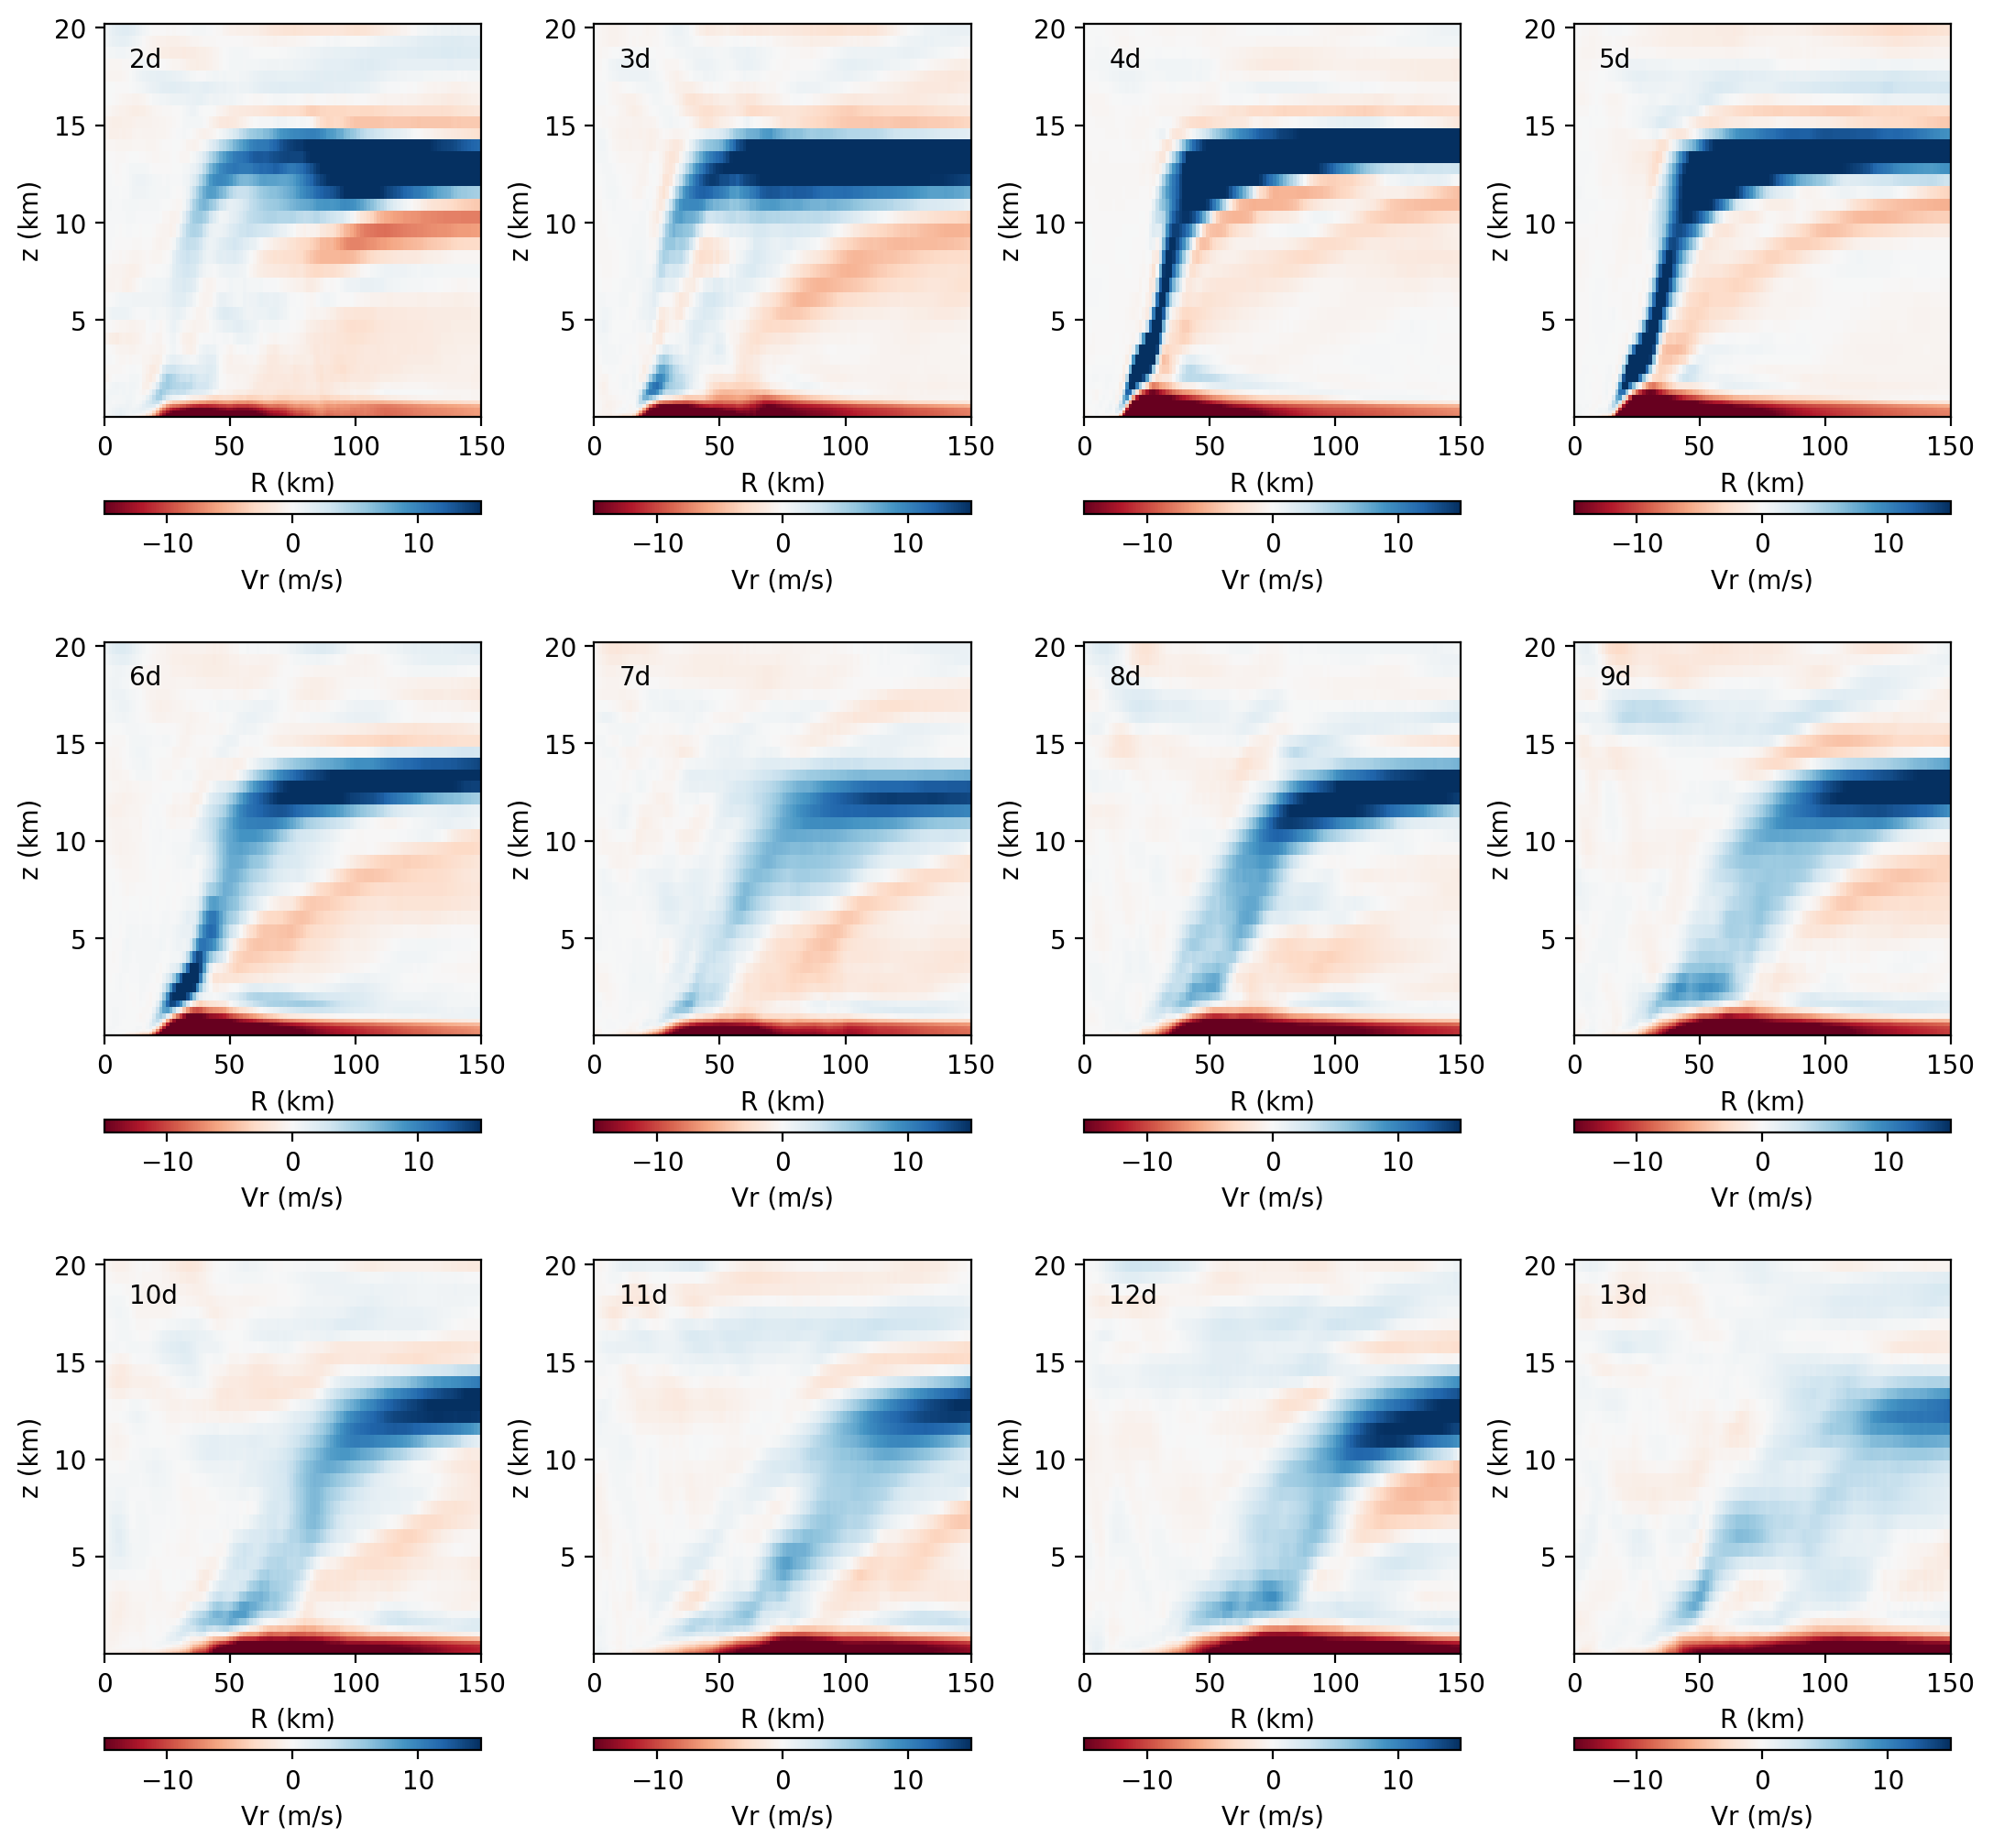

In [36]:
fig,axs=plt.subplots(3,4,figsize=(13,13),dpi=200)
plt.subplots_adjust(hspace=0.1,wspace=0.3)
cl=15

for n,fname in enumerate(flist[:12]):
    ax=axs.flat[n]
    vr=wrf.getWRF(fname,'vr',z='full',vtype='az')
    z=wrf.getHeightCoord(fname)
    r=wrf.getRcoord(fname)
    im=ax.pcolormesh(r,z[1:]/1000,vr.T,cmap=plt.get_cmap('RdBu'),shading='nearest')
    imclim=im.get_clim()
    im.set_clim(-imclim[1],imclim[1])
    im.set_clim(-cl,cl)

    ax.set_xlim(0,150)
    ax.set_xlabel('R (km)')
    ax.set_ylabel('z (km)')
#     ax.text(10,18,str(n)+'h',color='k')
    ax.text(10,18,str(n+2)+'d',color='k')
    fig.colorbar(im,ax=ax,orientation='horizontal',aspect=30,label='Vr (m/s)')

In [ ]:
vr=[wrf.getWRF(wopathlist[0],'vr',type='azdwcm',z='full',force=True) for fname in flist]

fig,axs=plt.subplots(1,1,figsize=(10,8),dpi=100)
def plot_sub(ax,xs,ylab):
    for n,x in enumerate(xs):
        ax.plot(r,x,color=cmap(n))
        ax.grid(True)
        ax.set_xlabel('R (km)')
        ax.set_ylabel(ylab)
cmap=cm.get_cmap('viridis',len(vr))

plot_sub(axs,vr, 'Density Weighted CA Vr (m/s)' )